In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from dateutil.parser import parse

In [2]:
df = pd.read_csv('timeseries_train.csv')

In [3]:
df.dtypes

DATE                         object
datetime_beginning_utc       object
mw                          float64
year                          int64
month                         int64
weekday                       int64
hour                          int64
HourlyDryBulbTemperature      int64
dtype: object

In [4]:
df.rename(columns={"HourlyDryBulbTemperature": "temp"}, inplace=True)

In [5]:
df.dtypes

DATE                       object
datetime_beginning_utc     object
mw                        float64
year                        int64
month                       int64
weekday                     int64
hour                        int64
temp                        int64
dtype: object

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

In [7]:
df.dtypes

datetime_beginning_utc     object
mw                        float64
year                        int64
month                       int64
weekday                     int64
hour                        int64
temp                        int64
dtype: object

In [8]:
df.rename(columns={"datetime_beginning_utc": "Date"}, inplace=True)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Date       datetime64[ns]
mw                float64
year                int64
month               int64
weekday             int64
hour                int64
temp                int64
dtype: object

In [11]:
sum(df['mw'].isnull())

0

In [12]:
# df.drop(columns=['Date'], inplace=True)

In [13]:
df.dtypes

Date       datetime64[ns]
mw                float64
year                int64
month               int64
weekday             int64
hour                int64
temp                int64
dtype: object

## Plot the training energy data over time.

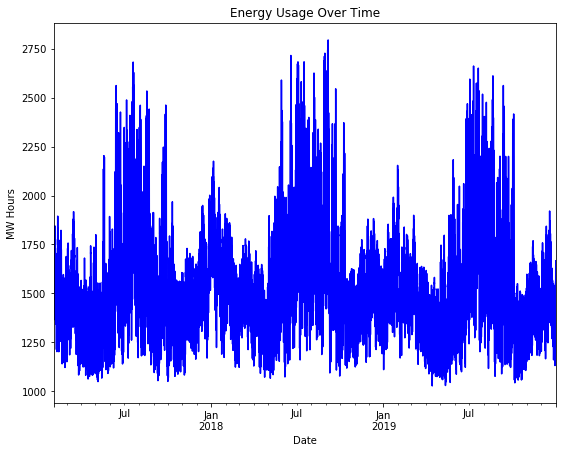

In [14]:
# df['mw'].plot()
ax1 = df['mw'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')
ax1.set_title('Energy Usage Over Time')

plt.show()

What generic overall patterns do you notice around seasons of the year?

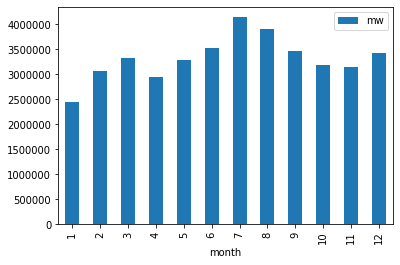

In [99]:
df[['month', 'mw']].groupby(['month']).sum().plot.bar()

## Plot the training temperature data over time.
    Compare the pattern that you see here to the pattern in the energy data.
    It might help to overlay the plots from the energy and temperature data to help with this.

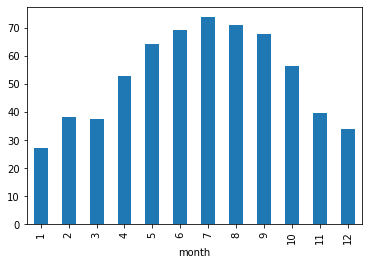

In [100]:
df[['month', 'temp']].groupby(['month']).mean().plot.bar(legend=None) # , ylabel='temp')

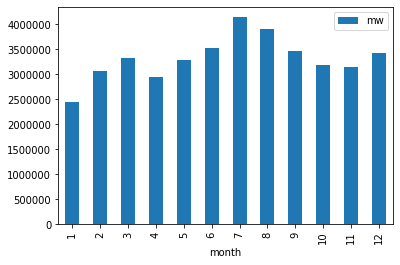

In [63]:
df[['month', 'mw']].groupby(['month']).sum().plot.bar()

## plot one week of the training energy data.
It is good to view the data and the patterns at a granular level as we are forecasting on the hourly basis. 
What overall patterns do you notice around day of the week? How about hours in a day?

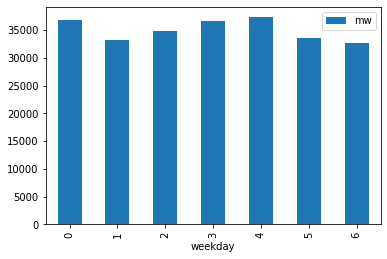

In [76]:
start = parse('2019-01-01')
end = parse('2019-01-08')
df.query(f"DATE >= '{start}' and DATE <= '{end}'")[['weekday', 'mw']].groupby(['weekday']).sum().plot.bar()

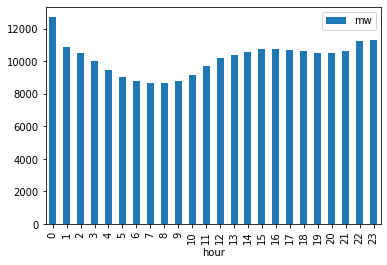

In [77]:
df.query(f"DATE >= '{start}' and DATE <= '{end}'")[['hour', 'mw']].groupby(['hour']).sum().plot.bar()

## Dive deeper and plot one week of the training temperature data.
    Compare the pattern that you see here to the pattern in the energy data.
    It might help to overlay the plots from the energy and temperature data to help with this. 
    Try this overlay during different seasons of the year.
    Specifically, try comparing one week of temperature and energy data in July and one week in January.
    What relationships are you seeing?

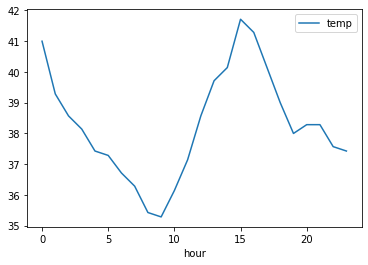

In [78]:
# overlay didn't work as expected
# ax = df.query(f"DATE >= '{start}' and DATE <= '{end}'")[['hour', 'mw']].groupby(['hour']).sum().plot()  
df.query(f"DATE >= '{start}' and DATE <= '{end}'"
        )[['hour', 'temp']].groupby(['hour']).mean().plot( ) #ax =ax)

### Compare with July

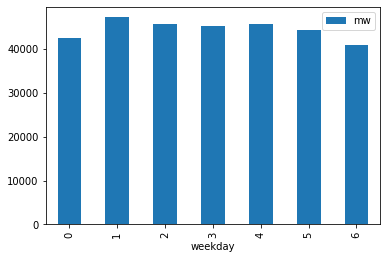

In [79]:
start = parse('2019-07-01')
end = parse('2019-07-08')
df.query(f"DATE >= '{start}' and DATE <= '{end}'")[['weekday', 'mw']].groupby(['weekday']).sum().plot.bar()

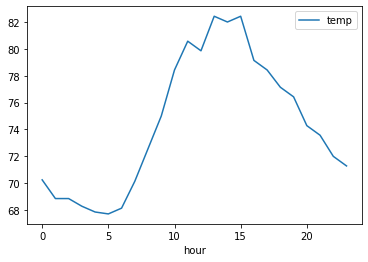

In [80]:
df.query(f"DATE >= '{start}' and DATE <= '{end}'"
        )[['hour', 'temp']].groupby(['hour']).mean().plot( )

#### July shows more demand and slightly different curve profile

## Calculate the correlation of your training energy data with your training temperature data.

In [81]:
df.corr()

,mw,year,month,weekday,hour,temp
mw,1.000000,-0.001550,0.016048,-0.139613,0.345664,0.273438
year,-0.001550,1.000000,-0.061171,-0.004186,-0.000342,-0.051521
month,0.016048,-0.061171,1.000000,0.007128,-0.000375,0.148181
weekday,-0.139613,-0.004186,0.007128,1.000000,-0.000134,-0.017566
hour,0.345664,-0.000342,-0.000375,-0.000134,1.000000,0.128620
temp,0.273438,-0.051521,0.148181,-0.017566,0.128620,1.000000


In [83]:
df.query(f"DATE >= '{start}' and DATE <= '{end}'").corr() 

,mw,year,month,weekday,hour,temp
mw,1.000000,NaN,NaN,-0.042658,0.577163,0.247253
year,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.042658,NaN,NaN,1.000000,0.014530,0.026059
hour,0.577163,NaN,NaN,0.014530,1.000000,0.415834
temp,0.247253,NaN,NaN,0.026059,0.415834,1.000000


#### mw, hour and temp are loosely correlated

## Plot a scatter plot between your training temperature and energy data.
    Note the pattern that you see here, as it will help inform our model in the next section.

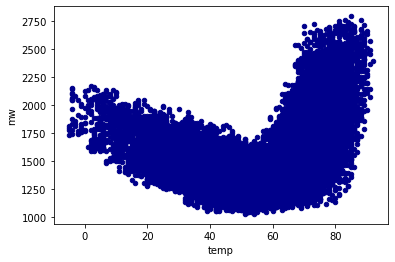

In [86]:
df.plot.scatter(x='temp',
                      y='mw',
                      c='DarkBlue')